In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
!pip install opencv-python

In [ ]:
! pip install tensorflow-gpu==2.10.0

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

2023-06-25 07:49:45.349674: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 07:49:46.384256: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


2023-06-25 07:51:10.644436: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-25 07:51:10.644499: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-84-116.ap-south-1.compute.internal): /proc/driver/nvidia/version does not exist
2023-06-25 07:51:10.650137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 5000 files belonging to 2 classes.


In [3]:
import tensorflow as tf

def process(image, label):
    resized_image = tf.image.resize(image, (256, 256))
    

    reshaped_image = tf.reshape(resized_image, [-1, 256, 256, 3])
    
 
    transposed_image = tf.transpose(reshaped_image, perm=[0, 3, 1, 2])
    

    processed_image = tf.cast(transposed_image / 255., tf.float32)
    
    return processed_image, label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import backend as K


K.set_image_data_format('channels_last') 

model = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(3, 256, 256), padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 256, 32)        73760     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 128, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 128, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 64, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 64, 64)         36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 32, 64)        0

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [8]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 241s 384ms/step - loss: 0.6161 - accuracy: 0.6605 - val_loss: 0.6193 - val_accuracy: 0.6576
Epoch 2/10
625/625 [==============================] - 238s 379ms/step - loss: 0.6061 - accuracy: 0.6725 - val_loss: 0.6285 - val_accuracy: 0.6490
Epoch 3/10
625/625 [==============================] - 247s 395ms/step - loss: 0.5954 - accuracy: 0.6827 - val_loss: 0.6093 - val_accuracy: 0.6740
Epoch 4/10
625/625 [==============================] - 232s 371ms/step - loss: 0.5819 - accuracy: 0.6931 - val_loss: 0.6122 - val_accuracy: 0.6692
Epoch 5/10
625/625 [==============================] - 242s 386ms/step - loss: 0.5655 - accuracy: 0.7068 - val_loss: 0.6159 - val_accuracy: 0.6712
Epoch 6/10
625/625 [==============================] - 241s 385ms/step - loss: 0.5516 - accuracy: 0.7171 - val_loss: 0.6262 - val_accuracy: 0.6616
Epoch 7/10
625/625 [==============================] - 237s 378ms/step - loss: 0.5269 - accuracy: 0.7348 - val_loss: 0.6695 -

In [9]:
def process_image(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    processed_image = tf.expand_dims(image_array, 0)
    processed_image = processed_image / 255.0 
    processed_image = tf.transpose(processed_image, perm=[0, 3, 1, 2])
    
    return processed_image


1/1 [==============================] - 0s 32ms/step
Cat


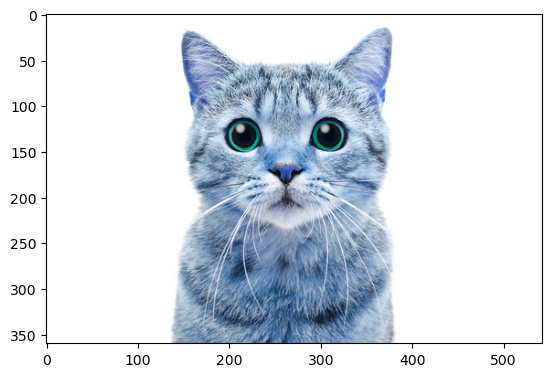

In [11]:
import matplotlib.pyplot as plt
import cv2
test_img = cv2.imread('image2.jpg')
plt.imshow(test_img)
test_img.shape
test_input = process_image('image2.jpg')
ans = model.predict(test_input)
prediction = ans[0,0]
if prediction>= 0.5:
     print("Dog")
else:
     print("Cat")